## Preparing data for modelling

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv('../data/survey.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [14]:
def clean_gender(gender):
  gender = str(gender).strip().lower()
  male_terms = ['male', 'm', 'man', 'msle', 'mail', 'malr', 'mal', 'cis male', 'cis man', 'guy', 'make']
  female_terms = ['female', 'f', 'woman', 'femake', 'cis female', 'cis-female/femme', 'female (cis)', 'female (trans)', 'trans-female']

  if gender in male_terms:
    return "Male"
  
  if gender in female_terms:
    return "Female"
  
  else:
    return "Other"

df['Gender'] = df['Gender'].apply(clean_gender)

In [15]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


### Select relevant features

In [16]:
selected_cols = [
    'Age', 'Gender', 'family_history', 'work_interfere', 'no_employees',
    'remote_work', 'benefits', 'care_options', 'wellness_program',
    'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
    'phys_health_consequence', 'coworkers', 'supervisor',
    'mental_health_interview', 'phys_health_interview',
    'mental_vs_physical', 'obs_consequence', 'treatment'  # target
]

df = df[selected_cols]

df.head()

,Age,Gender,family_history,work_interfere,no_employees,remote_work,benefits,care_options,wellness_program,seek_help,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,treatment
0,37,Female,No,Often,6-25,No,Yes,Not sure,No,Yes,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,Yes
1,44,Male,No,Rarely,More than 1000,No,Don't know,No,Don't know,Don't know,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,No
2,32,Male,No,Rarely,6-25,No,No,No,No,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,No
3,31,Male,Yes,Often,26-100,No,No,Yes,No,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,Yes
4,31,Male,No,Never,100-500,Yes,Yes,No,Don't know,Don't know,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,No


### Handle categorical variables

In [17]:

# fill missing values with mode for categorical, median for age
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = df[col].fillna(df[col].mode()[0])
  else:
    df[col] = df[col].fillna(df[col].median())

#encode categorical features using LabelEncoder
cat_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()
for col in cat_cols:
  df[col] = le.fit_transform(df[col])

In [18]:
print(df['treatment'].unique())   # 1- Yes and 0- No

df.head()

[1 0]


,Age,Gender,family_history,work_interfere,no_employees,remote_work,benefits,care_options,wellness_program,seek_help,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,treatment
0,37,0,0,1,4,0,2,1,1,2,...,2,1,1,1,2,1,0,2,0,1
1,44,1,0,2,5,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
2,32,1,0,2,4,0,1,0,1,1,...,1,1,1,2,2,2,2,1,0,0
3,31,1,1,1,2,0,1,2,1,1,...,1,2,2,1,0,0,0,1,1,1
4,31,1,0,0,1,1,2,0,0,0,...,0,1,1,1,2,2,2,0,0,0


In [19]:
# scale age i.e numerical feature for better fitting and prevent outliers or extremes
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])

### Train/Test split

In [20]:
X = df.drop('treatment', axis=1)
y = df['treatment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (1007, 20)
Test set shape: (252, 20)


In [22]:
X_train.to_csv('../data/X_train.csv', index=False)
X_test.to_csv('../data/X_test.csv', index=False)
y_train.to_csv('../data/y_train.csv', index=False)
y_test.to_csv('../data/y_test.csv', index=False)

## Training Model

In [8]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [14:24:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 Logistic Regression Evaluation:
Accuracy: 0.7142857142857143
Precision: 0.7413793103448276
Recall: 0.671875
F1 Score: 0.7049180327868853
ROC-AUC: 0.7585685483870969


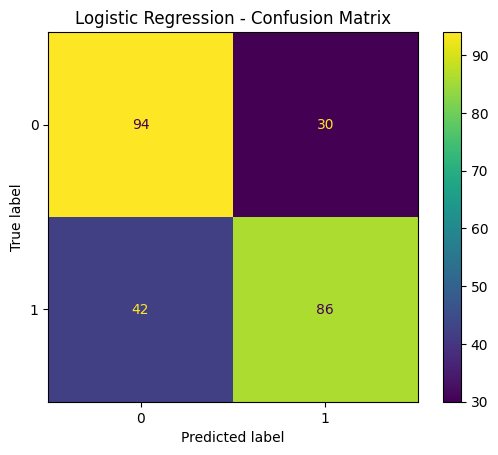

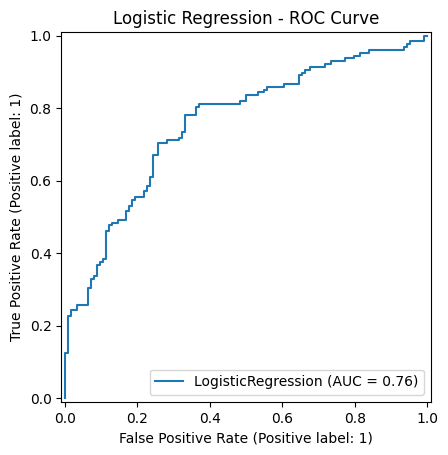


 Random Forest Evaluation:
Accuracy: 0.7182539682539683
Precision: 0.7394957983193278
Recall: 0.6875
F1 Score: 0.7125506072874493
ROC-AUC: 0.796906502016129


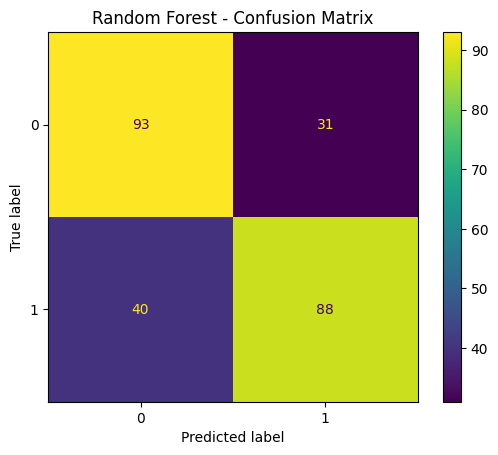

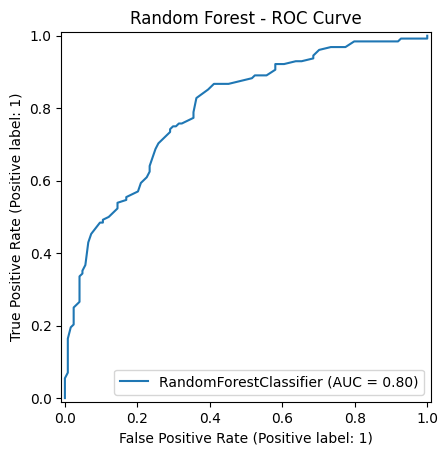


 XGBoost Evaluation:
Accuracy: 0.6547619047619048
Precision: 0.6915887850467289
Recall: 0.578125
F1 Score: 0.6297872340425532
ROC-AUC: 0.7511340725806452


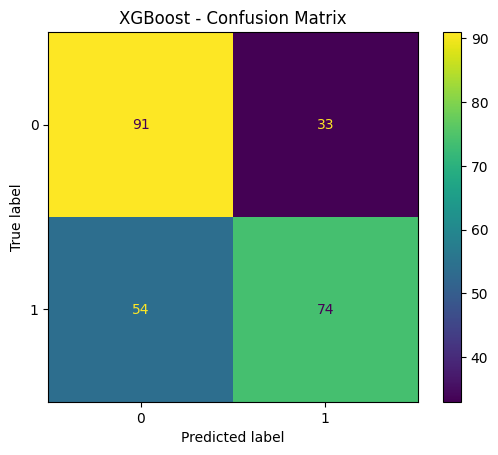

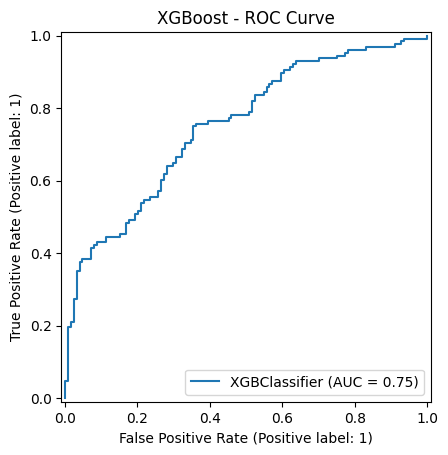

In [10]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
  accuracy_score, precision_score, recall_score,
  f1_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay,
  RocCurveDisplay
)
import matplotlib.pyplot as plt
import joblib

#load preprocessed data
X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
y_train = pd.read_csv('../data/y_train.csv').squeeze()
y_test = pd.read_csv('../data/y_test.csv').squeeze()

# Model 1: Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Model 2: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Model 3: XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)


# Evaluating function
def evaluate_model(name, y_true, y_pred, model, X_test):
    print(f"\n {name} Evaluation:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("ROC-AUC:", roc_auc_score(y_true, model.predict_proba(X_test)[:,1]))
    
    # Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
    plt.title(f'{name} - Confusion Matrix')
    plt.savefig(f'../images/{name.lower().replace(" ", "_")}_conf_matrix.png')
    plt.show()
    
    # ROC Curve
    RocCurveDisplay.from_estimator(model, X_test, y_true)
    plt.title(f'{name} - ROC Curve')
    plt.savefig(f'../images/{name.lower().replace(" ", "_")}_roc_curve.png')
    plt.show()

# Evaluate Models
evaluate_model("Logistic Regression", y_test, y_pred_lr, lr_model, X_test)
evaluate_model("Random Forest", y_test, y_pred_rf, rf_model, X_test)
evaluate_model("XGBoost", y_test, y_pred_xgb, xgb_model, X_test)


In [11]:
import os

# from above observations random forest seems to be best model for this survey
os.makedirs('../app', exist_ok=True)
joblib.dump(rf_model, '../app/best_model.pkl')

['../app/best_model.pkl']

## Interpreing model with random forest

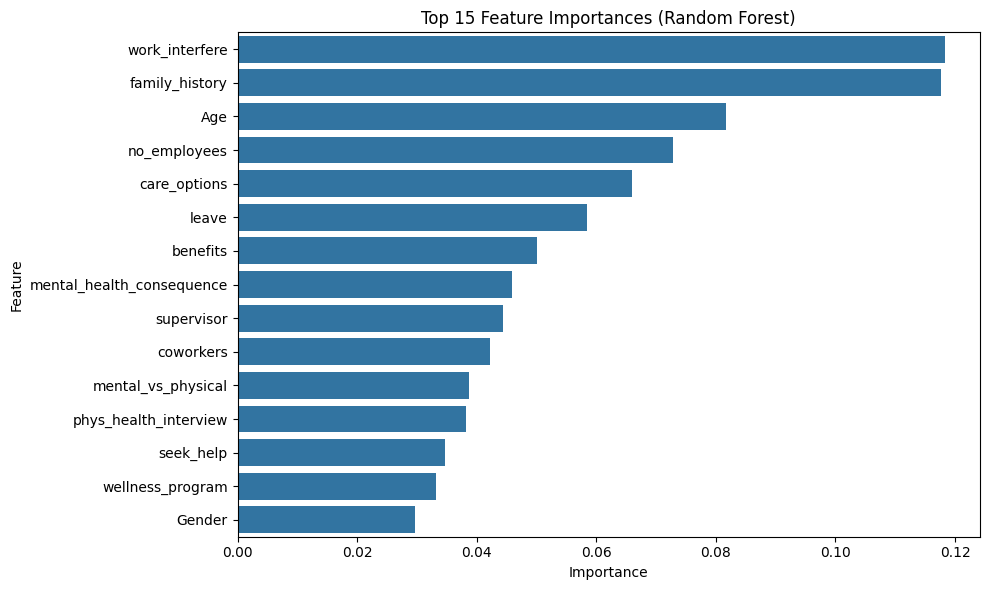

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance from Random Forest
importances = rf_model.feature_importances_
feature_names = X_train.columns

feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the top 15 important features
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df.head(15), x='Importance', y='Feature')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.tight_layout()
plt.savefig('../images/rf_feature_importance.png')
plt.show()

## Shap explanation

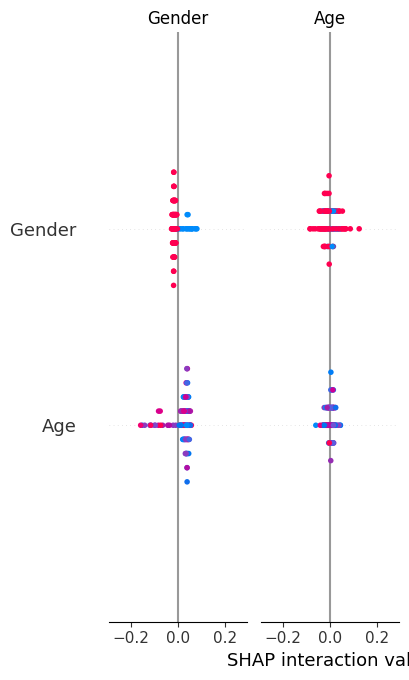

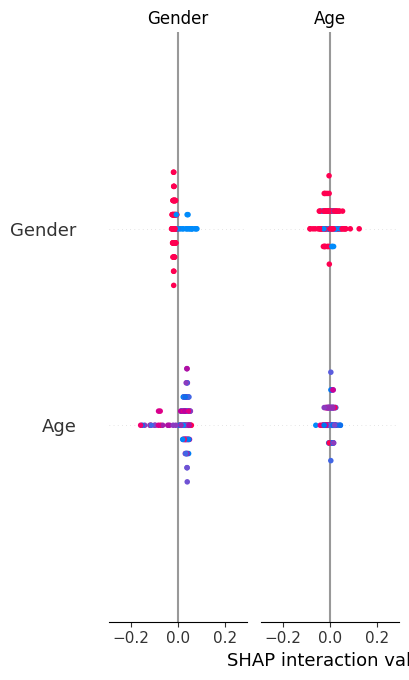

In [22]:
import shap

# SHAP works best with small sample size; use a subset
X_sample = X_test.sample(n=100, random_state=42)

# Explain the model
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_sample)

# SHAP summary plot
if isinstance(shap_values, list):
    shap.summary_plot(shap_values[1], X_sample, show=False)
else:
    shap.summary_plot(shap_values, X_sample, show=False)
plt.savefig('../images/shap_summary_rf.png')
plt.show()

# SHAP bar plot
if isinstance(shap_values, list):
    shap.summary_plot(shap_values[1], X_sample, plot_type="bar", show=False)
else:
    shap.summary_plot(shap_values, X_sample, plot_type="bar", show=False)
plt.savefig('../images/shap_bar_rf.png')
plt.show()

- Gender contributes more individually to the model prediction than Age.

- The interaction between Age and Gender is minimal, suggesting they influence the outcome largely independently.

- The model uses both features, but their combined effect is not significantly greater than their individual effects.